# Final project raw code 

In [1]:
#import the python library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

#versions of 

#stats lybraries
import statsmodels.api as sm 
import scipy

#here i set limits on what i allow the phyton to show in tables
from pandas import set_option
set_option('display.max_rows',8) 
#limits rows show in tablle by 10(above). change this number if you want more or less rows visible

## Data import and setting of the colunms names 

In [2]:
#import weather data to python. 
weather_data_quest = pd.read_csv('..//data/QuestU_Remote_Weather_Station_oct312015.csv',index_col='Date_Time')

#assigning columns names 
weather_data_quest.columns=[['num_test','Rainfall(mm)','temperature(C)','relative_humidity(%)','wind_direction','wind_speed(m/s)','gust_speed(m/s)']]

# making my my index veiwed as a date time subject not a string. 
weather_data_quest.index = pd.to_datetime(weather_data_quest.index)

#show what the table of weather_data_quest looks like. 
weather_data_quest

,num_test,Rainfall(mm),temperature(C),relative_humidity(%),wind_direction,wind_speed(m/s),gust_speed(m/s)
Date_Time,,,,,,,
2015-09-23 09:04:59,1,NaN,12.243,84.6,64.6,0.76,6.30
2015-09-23 09:19:59,2,0.0,12.316,84.4,92.7,0.00,0.76
2015-09-23 09:34:59,3,0.0,12.340,84.7,1.4,0.00,1.51
2015-09-23 09:49:59,4,0.0,12.074,84.6,7.0,0.00,1.26
...,...,...,...,...,...,...,...
2015-10-31 13:19:59,3666,0.2,12.654,94.5,99.7,0.00,1.51
2015-10-31 13:34:59,3667,0.0,12.122,97.9,233.1,0.00,1.76
2015-10-31 13:49:59,3668,0.2,11.880,98.2,203.6,0.00,2.52
2015-10-31 14:04:59,3669,0.4,11.734,98.1,140.4,0.00,0.50


   #### check what type of data working with

In [3]:
weather_data_quest.dtypes

num_test                  int64
Rainfall(mm)            float64
temperature(C)          float64
relative_humidity(%)    float64
wind_direction          float64
wind_speed(m/s)         float64
gust_speed(m/s)         float64
dtype: object

## Visualizing data in the froms of graphs

__Comment: It appears to be that you have multiple plots created from the following lines ("Wind Speed trend" and "Gust Speed trend"). If so, separating them into different line boxes or just having a clear markdown explaining what each plot shows and what questions it answers, would be helpful in using parts of your script separately, fixing bugs (should there be some), etc. The figures themselves can be added together later. Just general practice tip as a reader! __

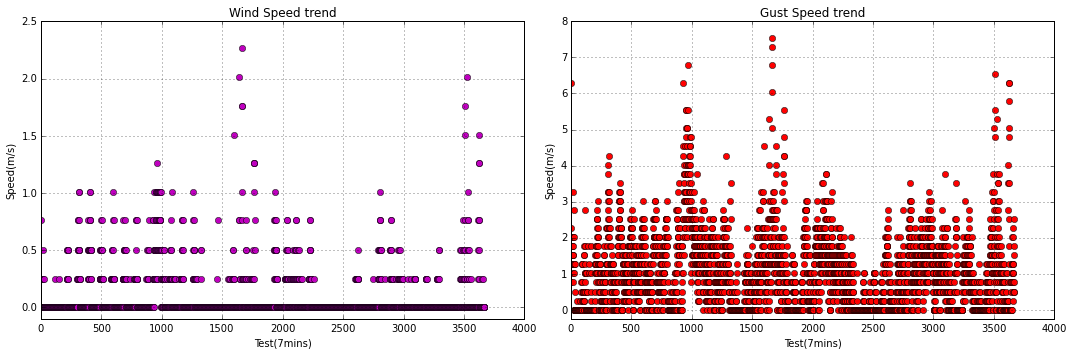

In [4]:
plt.figure(figsize=(15,5))

# define subplot 1 
plt.subplot(1,2,1)
plt.plot(weather_data_quest['wind_speed(m/s)'], marker='o', color='m', linestyle='')

#add title
plt.title('Wind Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Test(7mins)')

#modify x axis limits

plt.xlim(-1,)
plt.ylim(-.1,)


# define subplot 2
plt.subplot(1,2,2)
plt.plot(weather_data_quest['gust_speed(m/s)'], marker='o', color='r',linestyle='' )

#add title
plt.title('Gust Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Test(7mins)')

#modify x axis limits

plt.xlim(-.1,)
plt.ylim(-.25,)

#gice plots some breathing room
plt.tight_layout()

#show plot 
plt.show()

__Comment: could you a bit more clearly label what the x-axis is in the Gust Speed trend plot? It's a bit unclear whether these are test numbers /7mins, or what the time aspect is of this.__

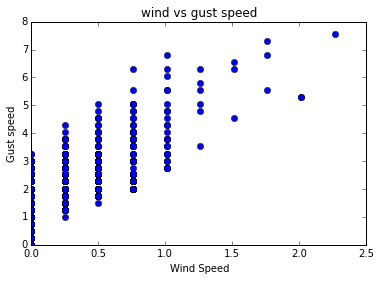

In [5]:
# here is a graph that shows wind speed vs gust speed. 
plt.plot(weather_data_quest['wind_speed(m/s)'], weather_data_quest['gust_speed(m/s)'], linestyle='' , marker='o')

#adding labels to the graph 
plt.xlabel('Wind Speed')
plt.ylabel('Gust speed')
plt.title('wind vs gust speed')

#showing the graph. 
plt.show()

## Statistical code 

weird problem happening with my variables not showing up when ran. its happening for wind_speed(m.s) and for temperature(C) 

__Comment: What are you trying to find out by running stats test? Each test, and operation with code, should have a purpose of answering a question (an "English" question, about the science of your project). Starting with a question and/or goal for each part of your script will help you choose the best tests and help you create meaningful answers for your future analysis and writeup of your scientific/computational study.___

__Using Tiffany's flow chart for what kind of stats test to use may help. Which data are you trying to compare statistically? Say so in a markdown for the reader.__

__Below I tried editing your inputs for the stats test. I tried a few syntax arrangements, each with a different error message returned. This one talks about the set output...I'm not sure what's happening with that.__

## Nico - its the brackets in your columns that are throwing the errors. Remove them and your regression will work!

In [13]:
# rename columns 
weather_data_quest_new_col_names = weather_data_quest
weather_data_quest_new_col_names.columns = ['num_test','Rainfall','temperature','relative_humidity','wind_direction','wind_speed','gust_speed']
weather_data_quest_new_col_names.head()

,num_test,Rainfall,temperature,relative_humidity,wind_direction,wind_speed,gust_speed
Date_Time,,,,,,,
2015-09-23 09:04:59,1,NaN,12.243,84.6,64.6,0.76,6.30
2015-09-23 09:19:59,2,0,12.316,84.4,92.7,0.00,0.76
2015-09-23 09:34:59,3,0,12.340,84.7,1.4,0.00,1.51
2015-09-23 09:49:59,4,0,12.074,84.6,7.0,0.00,1.26
2015-09-23 10:04:59,5,0,12.413,86.3,325.7,0.00,1.26


In [14]:
lm = sm.formula.ols(formula='gust_speed ~ wind_speed', data= weather_data_quest ).fit()


In [15]:
lm.params #What is "lm" you are using here (in your code lines you wrote below)?

Intercept     0.696602
wind_speed    3.745481
dtype: float64

In [16]:
lm = sm.formula.ols(formula='gust_speed~wind_speed', data= weather_data_quest ).fit()
lm.params

Intercept     0.696602
wind_speed    3.745481
dtype: float64

In [17]:
x = pd.DataFrame({'wind_speed': range(0,3)})
x 

#What exactly are you printing here?

,wind_speed
0,0
1,1
2,2


__Comment: Is the following cell a new function 'predict', to predict future data points in the DataFrame you created?__

In [18]:
y = lm.predict(x)

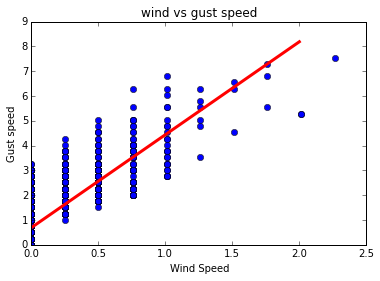

In [22]:
plt.plot(weather_data_quest_new_col_names['wind_speed'], weather_data_quest_new_col_names['gust_speed'], linestyle='' , marker='o')

plt.xlabel('Wind Speed')
plt.ylabel('Gust speed')
plt.title('wind vs gust speed')

plt.plot(x, y, color='red', linewidth=3)

plt.show()

##Nico - I have fixed the code up until here, after this you should be good to fix it yourself

__Comment: Is the above code bite a stats test? It looks like you could find some neat correlation between Gust and Win speed. I suggest using a test for normal distribution, like the Shapiro Wilks test, to find the p value. If p < 0.05, you can reject the null hypothesis--that your data *is* normally disributed. You can then choose a test for statistical significance of your data if it is or is not normally distributed.  This link may be helpful: http://nullege.com/codes/search/scipy.stats.shapiro __


__Comment: Are you trying to make a fit line? Your motives for this operation are a bit unclear, which makes it harder to suggest fixes/alternatives.__

In [ ]:
lm_1 = sm.formula.ols(formula='temperature(C) ~ relative_humidity(%)', data= weather_data_quest).fit()

lm_2 = sm.formula.ols(formula='temperature(C) ~ gust_speed(m/s) + wind_speed(m/s) + relative_humidity(%) + rainfall(mm)', data= weather_data_quest ).fit()

print(lm_1.rsquared_adj, lm_2.rsquared_adj)

__Comment: Overall, great use of headers for different sections of your script. Adding a markdown cell below each header would help the reader get a sense of what's about to happen in the upcoming code cells.__

__Creating a framework for your script before you start coding, which includes questions would help determine necessary script items and would increase readability, reusability, and reduce script issues. This roadmap can then be used as an outline of #comments within which code can be inserted. __

__When doing stats test: starting with a question you want answered, that only stats test(s), can answer for you, would help you choose the best tests for your specific data set and the variables relationships.__